In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    f1_score,
    r2_score,
    roc_auc_score, 
    roc_curve
)
from imblearn.over_sampling import SMOTE # to balance the dataset
from sklearn.datasets import make_classification # to balance the dataset
from sklearn.preprocessing import MinMaxScaler # for normalization

In [2]:
#data fetch

empdata = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

#data copy 

empcpy = empdata.copy()
print(empcpy.shape)

(1470, 35)


In [3]:
# printing first 5 records
empcpy.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# checking the attrition rate
empcpy['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [5]:
# checking the missing values
empcpy.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#checking the datatype of all the features
empcpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# filtering the categorical variables
empcpy.select_dtypes(include=['object']).dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [8]:
# encoding the column attrition and overtime manually
empcpy['Attrition'] = empcpy['Attrition'].factorize(['No','Yes'])[0]

# Attrition: No = 0; Yes = 1

empcpy['OverTime'] = empcpy['OverTime'].factorize(['No','Yes'])[0]

#OverTime: No = 0; Yes = 1

In [9]:
# remaining categorical features
empcpy.select_dtypes(include=['object']).dtypes

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
dtype: object

In [10]:
# FEATURE IMPORTANCE

# Copying the empcpy to feat_evaldb to analyse the feature importance
feat_evaldb = empcpy.copy()
feat_evaldb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
# encoding all other categorical variables 

feat_evaldb['Department'] = preprocessing.LabelEncoder().fit_transform(feat_evaldb['Department'])
feat_evaldb['Gender'] = preprocessing.LabelEncoder().fit_transform(feat_evaldb['Gender'])
feat_evaldb['JobRole'] = preprocessing.LabelEncoder().fit_transform(feat_evaldb['JobRole'])
feat_evaldb['MaritalStatus'] = preprocessing.LabelEncoder().fit_transform(feat_evaldb['MaritalStatus'])
feat_evaldb['Over18'] = preprocessing.LabelEncoder().fit_transform(feat_evaldb['Over18'])
feat_evaldb['BusinessTravel'] = preprocessing.LabelEncoder().fit_transform(feat_evaldb['BusinessTravel'])
feat_evaldb['EducationField'] = preprocessing.LabelEncoder().fit_transform(feat_evaldb['EducationField'])

display(feat_evaldb['BusinessTravel'])

0       2
1       1
2       2
3       1
4       2
       ..
1465    1
1466    2
1467    2
1468    1
1469    2
Name: BusinessTravel, Length: 1470, dtype: int32

In [12]:
# seperating the dependent and independent variables to find the feature importance
m = feat_evaldb.drop(columns=['Attrition'])
n = feat_evaldb['Attrition']

In [13]:
#checking the first 10 feature importance using SelectKBest

selector = SelectKBest(score_func=f_classif, k=10)
m_selected = selector.fit_transform(m, n)
selected_features = m.columns[selector.get_support()]

# printing the importance value of the first 10 features
feature_importances = pd.DataFrame({'Feature': m.columns, 'Importance': selector.scores_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

grid_table = tabulate(feature_importances[feature_importances['Feature'].isin(selected_features)],
                      headers='keys', tablefmt='grid')
print(grid_table)


+----+----------------------+--------------+
|    | Feature              |   Importance |
+====+======================+==============+
| 21 | OverTime             |      94.6565 |
+----+----------------------+--------------+
| 27 | TotalWorkingYears    |      44.2525 |
+----+----------------------+--------------+
| 13 | JobLevel             |      43.2153 |
+----+----------------------+--------------+
| 16 | MaritalStatus        |      39.5998 |
+----+----------------------+--------------+
| 31 | YearsInCurrentRole   |      38.8383 |
+----+----------------------+--------------+
| 17 | MonthlyIncome        |      38.4888 |
+----+----------------------+--------------+
|  0 | Age                  |      38.1759 |
+----+----------------------+--------------+
| 33 | YearsWithCurrManager |      36.7123 |
+----+----------------------+--------------+
| 26 | StockOptionLevel     |      28.1405 |
+----+----------------------+--------------+
| 30 | YearsAtCompany       |      27.0016 |
+----+----

C:\Users\LoKee\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 7 20 25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\LoKee\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


<AxesSubplot:>

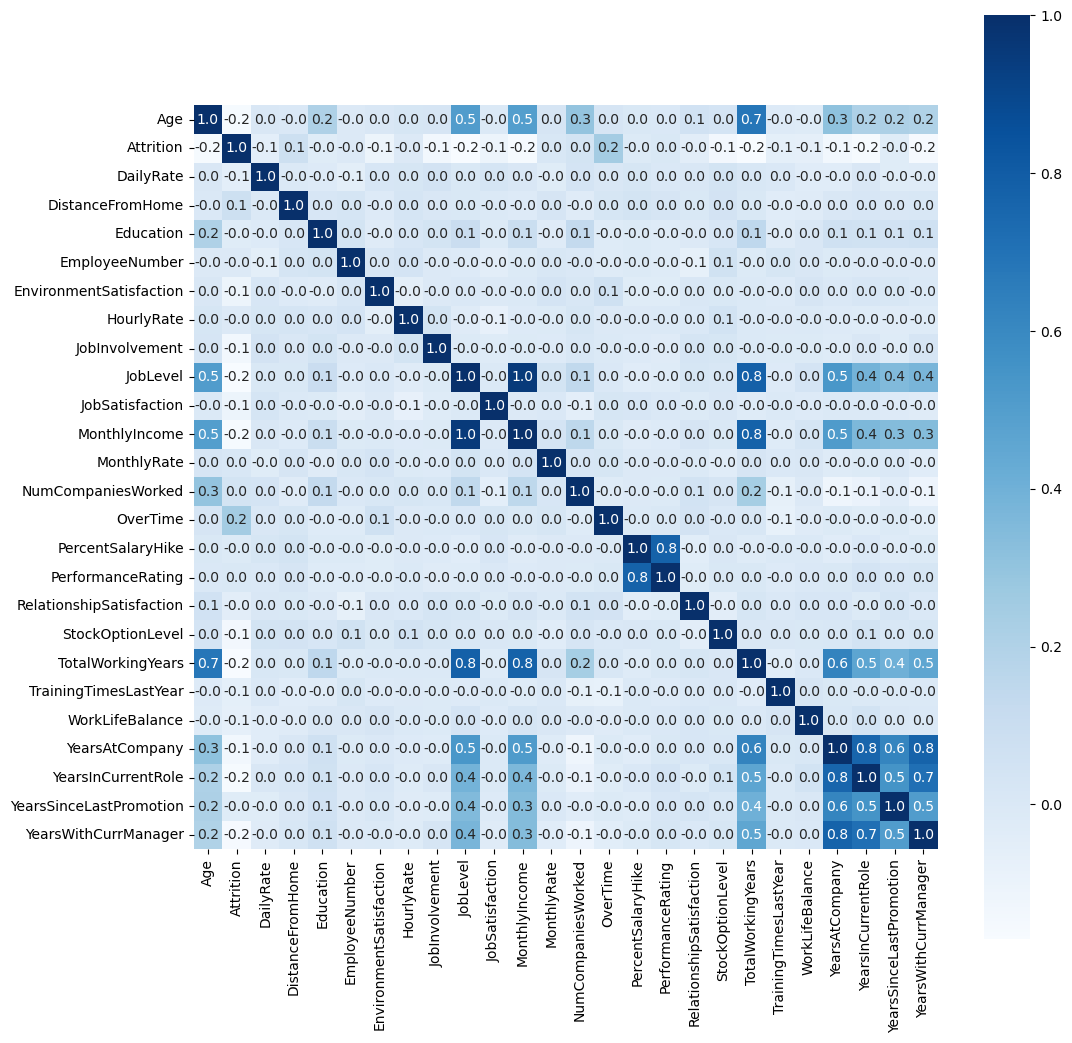

In [14]:
# checking the correlation between features using corr()
empcpy1 = empcpy.copy()
empcpy1 = empcpy1.drop(['EmployeeCount','StandardHours'], axis=1) # dropping these two columns because they only have one value
corr = empcpy1.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')

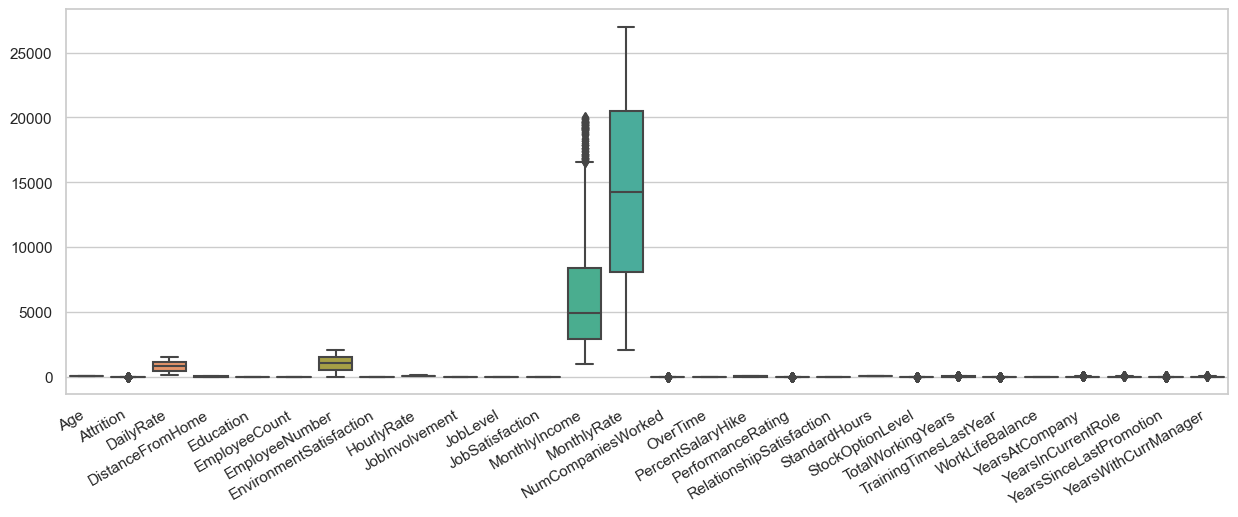

In [15]:
# Checking outliers by box plot

sns.set(style="whitegrid")
fig, axis = plt.subplots(figsize=(15,5)) 
sns.boxplot(data = empcpy, ax=axis)
plt.xticks(rotation=30, ha='right')
plt.show()

In [16]:
# Creating a copy to work on both balanced and imbalanced datasets

empcpy_imbal = empcpy.copy()

feature_names = [
    'BusinessTravel',
    'EducationField'
] # unimportant features to our analysis

# Removing the unimportant features with object datatype
empcpy_imbal = empcpy_imbal.drop(feature_names, axis=1)

empcpy_imbal.describe()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [17]:
# datatype of features in the imbalanced dataset 
empcpy_imbal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EmployeeCount             1470 non-null   int64 
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [18]:
# Converting the categorical variables to numerical

empcpy_imbal['Department'] = preprocessing.LabelEncoder().fit_transform(empcpy_imbal['Department'])
empcpy_imbal['Gender'] = preprocessing.LabelEncoder().fit_transform(empcpy_imbal['Gender'])
empcpy_imbal['JobRole'] = preprocessing.LabelEncoder().fit_transform(empcpy_imbal['JobRole'])
empcpy_imbal['MaritalStatus'] = preprocessing.LabelEncoder().fit_transform(empcpy_imbal['MaritalStatus'])
empcpy_imbal['Over18'] = preprocessing.LabelEncoder().fit_transform(empcpy_imbal['Over18'])


In [19]:
#Balancing the dataset using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Separating the features and the target variable
X = empcpy_imbal.drop(columns=['Attrition'])
y = empcpy_imbal['Attrition']

X_resampled, y_resampled = smote.fit_resample(X, y)

In [20]:
# Combining them to make a balanced dataset
empcpy_balanced = pd.concat([X_resampled, y_resampled], axis=1)

empcpy_balanced.describe()

,Age,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.0,2466.000000,2466.000000,2466.000000,2466.000000,...,2466.0,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
mean,35.431873,781.935118,1.182887,9.757097,2.741687,1.0,1032.206002,2.478102,0.515004,65.565288,...,80.0,0.591646,9.875101,2.570965,2.607461,6.101379,3.545823,1.957826,3.443228,0.500000
std,9.009957,378.001308,0.533091,7.720721,0.976489,0.0,563.289834,1.068699,0.499876,19.097359,...,0.0,0.792405,7.492675,1.214196,0.725100,5.926482,3.331534,2.989204,3.296353,0.500101
min,18.000000,102.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,30.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,469.000000,1.000000,3.000000,2.000000,1.0,557.250000,2.000000,0.000000,50.000000,...,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,34.000000,760.000000,1.000000,8.000000,3.000000,1.0,1037.500000,3.000000,1.000000,65.000000,...,80.0,0.000000,8.000000,2.000000,3.000000,5.000000,2.000000,1.000000,2.000000,0.500000
75%,41.000000,1097.000000,1.750000,15.000000,3.000000,1.0,1497.750000,3.000000,1.000000,82.000000,...,80.0,1.000000,13.000000,3.000000,3.000000,8.000000,6.000000,2.000000,6.000000,1.000000
max,60.000000,1499.000000,2.000000,29.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


In [21]:
# splitting the attributes of the imbalanced dataset
a = empcpy_imbal.drop('Attrition', axis = 1) 
b = empcpy_imbal['Attrition']

# normalizing the dataset using standard scaler
Scaler = StandardScaler()
a = Scaler.fit_transform(a)

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=2)

In [22]:
# Logistic regression model
model = LogisticRegression()

# Fitting the model with the training data
model.fit(a_train, b_train)

# Making the predictions on the test data
b_pred = model.predict(a_test)

# Printing the results
accuracy = accuracy_score(b_test, b_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(b_test, b_pred))

print("Confusion Matrix:")
print(confusion_matrix(b_test, b_pred))

# Accessing the important features and printing them
coefficients = pd.DataFrame({'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

print("Most Contributing Features:")
print(coefficients.head(5))

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       246
           1       0.67      0.29      0.41        48

    accuracy                           0.86       294
   macro avg       0.77      0.63      0.66       294
weighted avg       0.84      0.86      0.84       294

Confusion Matrix:
[[239   7]
 [ 34  14]]
Most Contributing Features:
    Coefficient
19     0.830186
30     0.538123
14     0.508486
28     0.500319
17     0.390164


In [23]:
# AUC-ROC curve prediction
b_probs = model.predict_proba(a_test)[:, 1]

# printing the AUC-ROC curve value
roc_auc = roc_auc_score(b_test, b_probs)
print(f"AUC-ROC Curve Value: {roc_auc:.2f}")

AUC-ROC Curve Value: 0.79


In [24]:
# splitting the attributes of the balanced dataset
X = empcpy_balanced.drop('Attrition', axis = 1)
y = empcpy_balanced['Attrition']

Scaler = StandardScaler()
X = Scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [25]:
#logistic regression model
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

coefficients = pd.DataFrame({'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

print("Most Contributing Features:")
print(coefficients.head(5))

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       236
           1       0.84      0.83      0.83       258

    accuracy                           0.83       494
   macro avg       0.83      0.83      0.83       494
weighted avg       0.83      0.83      0.83       494

Confusion Matrix:
[[194  42]
 [ 44 214]]
Most Contributing Features:
    Coefficient
28     0.823158
30     0.498360
19     0.453780
17     0.301815
3      0.262935


In [26]:
# AUC-ROC
y_probs = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_probs)
print(f"AUC-ROC Curve Value: {roc_auc:.2f}")

AUC-ROC Curve Value: 0.91


In [63]:
# Decision Tree classifier
model = DecisionTreeClassifier()

model.fit(a_train, b_train)

b_pred = model.predict(a_test)

# printing the accuracy
accuracy = accuracy_score(b_test, b_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(b_test, b_pred))

print("Confusion Matrix:")
print(confusion_matrix(b_test, b_pred))

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       246
           1       0.37      0.38      0.37        48

    accuracy                           0.79       294
   macro avg       0.62      0.62      0.62       294
weighted avg       0.79      0.79      0.79       294

Confusion Matrix:
[[215  31]
 [ 30  18]]


In [28]:
# AUC-ROC curve
b_probs = model.predict_proba(a_test)[:, 1]

roc_auc = roc_auc_score(b_test, b_probs)
print(f"AUC-ROC Curve Value: {roc_auc:.2f}")

AUC-ROC Curve Value: 0.63


In [62]:
# Decision Tree classifier for the hyperparameter tuning in the imbalanced dataset
model = DecisionTreeClassifier()

# Defining the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(a_train, b_train)

best_params = grid_search.best_params_

# Printing the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Finding the best model
best_model = grid_search.best_estimator_

b_pred = best_model.predict(a_test)

# Printing the accuracy
accuracy = accuracy_score(b_test, b_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(b_test, b_pred))

print("Confusion Matrix:")
print(confusion_matrix(b_test, b_pred))

Best Hyperparameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       246
           1       0.48      0.42      0.44        48

    accuracy                           0.83       294
   macro avg       0.68      0.66      0.67       294
weighted avg       0.82      0.83      0.83       294

Confusion Matrix:
[[224  22]
 [ 28  20]]


In [64]:
# Decision Tree classifier
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       236
           1       0.80      0.82      0.81       258

    accuracy                           0.80       494
   macro avg       0.80      0.80      0.80       494
weighted avg       0.80      0.80      0.80       494

Confusion Matrix:
[[183  53]
 [ 46 212]]


In [31]:
# AUC-ROC curve
y_probs = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_probs)
print(f"AUC-ROC Curve Value: {roc_auc:.2f}")

AUC-ROC Curve Value: 0.79


In [61]:
# Decision Tree classifier for the hyperparameter tuning in balanced dataset
model = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# Printing the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

best_model = grid_search.best_estimator_

b_pred = best_model.predict(X_test)

# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       236
           1       0.88      0.88      0.88       258

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494

Confusion Matrix:
[[205  31]
 [ 30 228]]


Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       246
           1       0.73      0.17      0.27        48

    accuracy                           0.85       294
   macro avg       0.79      0.58      0.59       294
weighted avg       0.84      0.85      0.81       294

Confusion Matrix:
[[243   3]
 [ 40   8]]


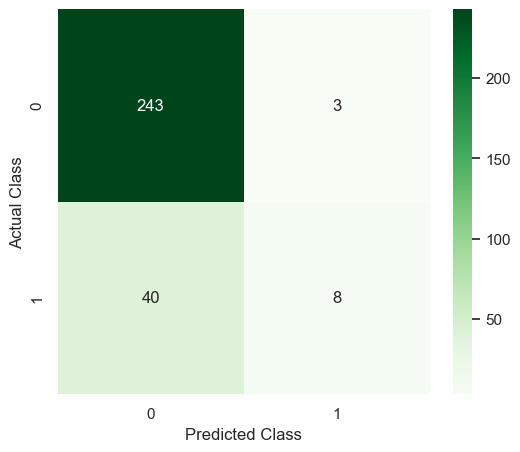

Feature Importance:
    Importance
15    0.077486
0     0.065591
16    0.056884
19    0.054818
1     0.054638
25    0.052628
6     0.048147
3     0.048075
9     0.045615
28    0.041909
20    0.038231
17    0.032835
31    0.031089
7     0.030396
12    0.029666
24    0.029389
10    0.028030
26    0.027223
13    0.026563
30    0.026378
29    0.026330
27    0.023794
22    0.021609
14    0.020106
4     0.018153
11    0.016208
2     0.013827
8     0.008564
21    0.005816
5     0.000000
18    0.000000
23    0.000000


In [33]:
# Random Forest classifier
model = RandomForestClassifier()

model.fit(a_train, b_train)

b_pred = model.predict(a_test)

# Printing the accuracy
accuracy = accuracy_score(b_test, b_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(b_test, b_pred))

print("Confusion Matrix:")
con_mat = confusion_matrix(b_test, b_pred)
print(con_mat)

# Visualizing the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(con_mat, annot=True, cmap="Greens", fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

# Printing the index of the important features 
feature_importance = pd.DataFrame({'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

In [34]:
# AUC-ROC curve
b_probs = model.predict_proba(a_test)[:, 1]

roc_auc = roc_auc_score(b_test, b_probs)
print(f"AUC-ROC Curve Value: {roc_auc:.2f}")

AUC-ROC Curve Value: 0.81


In [35]:
# Random Forest classifier
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Printing the results
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Printing the index of the important features
feature_importance = pd.DataFrame({'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       236
           1       0.95      0.91      0.93       258

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494

Confusion Matrix:
[[223  13]
 [ 23 235]]
Feature Importance:
    Importance
24    0.071571
15    0.064085
13    0.063493
7     0.048918
16    0.046200
10    0.045448
1     0.044221
31    0.043290
6     0.042920
3     0.041414
0     0.040393
25    0.039186
9     0.038569
22    0.038265
29    0.037965
28    0.033953
11    0.030738
27    0.030116
26    0.029335
20    0.027352
17    0.022536
30    0.022287
4     0.022187
12    0.021580
14    0.017303
19    0.011013
8     0.008864
2     0.008855
21    0.007944
18    0.000000
23    0.000000
5     0.000000


In [36]:
# AUC-ROC curve
y_probs = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_probs)
print(f"AUC-ROC Curve Value: {roc_auc:.2f}")

AUC-ROC Curve Value: 0.98


In [37]:
# SVM classifier
model = SVC(probability=True)  

model.fit(a_train, b_train)

b_pred = model.predict(a_test)

# Printing the accuracy
accuracy = accuracy_score(b_test, b_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(b_test, b_pred))

print("Confusion Matrix:")
confmat = confusion_matrix(b_test, b_pred)
print(confmat)

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       246
           1       0.69      0.19      0.30        48

    accuracy                           0.85       294
   macro avg       0.78      0.59      0.61       294
weighted avg       0.83      0.85      0.82       294

Confusion Matrix:
[[242   4]
 [ 39   9]]


In [38]:
# AUC-ROC curve
b_probs = model.predict_proba(a_test)[:, 1]

roc_auc = roc_auc_score(b_test, b_probs)
print(f"AUC-ROC Curve Value: {roc_auc:.2f}")

AUC-ROC Curve Value: 0.82


Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       236
           1       0.93      0.90      0.92       258

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494

Confusion Matrix:
[[218  18]
 [ 25 233]]


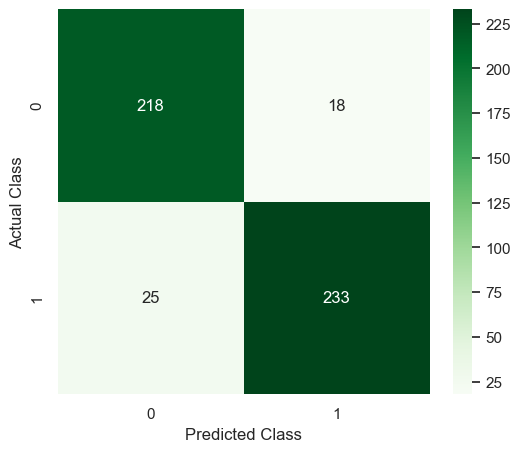

In [39]:
# SVM classifier
model = SVC(probability=True)  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
confmat = confusion_matrix(y_test, y_pred)
print(confmat)

# Visualizing the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confmat, annot=True, cmap="Greens", fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

In [40]:
# AUC-ROC curve
y_probs = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_probs)
print(f"AUC-ROC Curve Value: {roc_auc:.2f}")

AUC-ROC Curve Value: 0.97


In [41]:
# k-NN classifier with k=3
model = KNeighborsClassifier(n_neighbors=3)

model.fit(a_train, b_train)

b_pred = model.predict(a_test)

# Printing the accuracy
accuracy = accuracy_score(b_test, b_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(b_test, b_pred))

print("Confusion Matrix:")
print(confusion_matrix(b_test, b_pred))

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       246
           1       0.42      0.17      0.24        48

    accuracy                           0.83       294
   macro avg       0.64      0.56      0.57       294
weighted avg       0.78      0.83      0.79       294

Confusion Matrix:
[[235  11]
 [ 40   8]]


C:\Users\LoKee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [42]:
# AUC-ROC curve
b_probs = model.predict_proba(a_test)[:, 1]

roc_auc = roc_auc_score(b_test, b_probs)
print(f"AUC-ROC Curve Value: {roc_auc:.2f}")

AUC-ROC Curve Value: 0.70


In [43]:
# k-NN classifier with k=3
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.68      0.81       236
           1       0.77      0.99      0.87       258

    accuracy                           0.84       494
   macro avg       0.88      0.84      0.84       494
weighted avg       0.88      0.84      0.84       494

Confusion Matrix:
[[161  75]
 [  2 256]]


C:\Users\LoKee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [44]:
# AUC-ROC curve
y_probs = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_probs)
print(f"AUC-ROC Curve Value: {roc_auc:.2f}")

AUC-ROC Curve Value: 0.92


In [45]:
# AdaBoost classifier with estimators=50
base_model = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(base_model, n_estimators=50)

model.fit(a_train, b_train)

b_pred = model.predict(a_test)

# Printing the accuracy
accuracy = accuracy_score(b_test, b_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(b_test, b_pred))

print("Confusion Matrix:")
print(confusion_matrix(b_test, b_pred))

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       246
           1       0.70      0.40      0.51        48

    accuracy                           0.87       294
   macro avg       0.80      0.68      0.72       294
weighted avg       0.86      0.87      0.86       294

Confusion Matrix:
[[238   8]
 [ 29  19]]


In [46]:
# k-fold crossvalidation
base_model = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(base_model, n_estimators=50)
X_combined = np.vstack((a_train, a_test))
y_combined = np.hstack((b_train, b_test))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_results = cross_val_score(model, X_combined, y_combined, cv=cv, scoring='accuracy')

# Printing the cross-validation results
print("Cross Validation of the best performing model: AdaBoost")
print("Mean Accuracy:", np.mean(cross_val_results))
print("Standard Deviation:", np.std(cross_val_results))

Cross Validation of the best performing model: AdaBoost
Mean Accuracy: 0.8537414965986395
Standard Deviation: 0.008049088140271558


In [47]:
# AdaBoost classifier with estimators=50
base_model = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(base_model, n_estimators=50)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       236
           1       0.84      0.87      0.85       258

    accuracy                           0.84       494
   macro avg       0.84      0.84      0.84       494
weighted avg       0.84      0.84      0.84       494

Confusion Matrix:
[[193  43]
 [ 34 224]]


In [48]:
# CatBoost classifier
model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

model.fit(a_train, b_train)
b_pred = model.predict(a_test)

# Printing the accuracy
accuracy = accuracy_score(b_test, b_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(b_test, b_pred))

print("Confusion Matrix:")
print(confusion_matrix(b_test, b_pred))

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       246
           1       0.75      0.25      0.38        48

    accuracy                           0.86       294
   macro avg       0.81      0.62      0.65       294
weighted avg       0.85      0.86      0.83       294

Confusion Matrix:
[[242   4]
 [ 36  12]]


In [49]:
# AUC-ROC curve
b_probs = model.predict_proba(a_test)[:, 1]

roc_auc = roc_auc_score(b_test, b_probs)
print(f"AUC-ROC Curve Value: {roc_auc:.2f}")

AUC-ROC Curve Value: 0.81


In [50]:
# CatBoost classifier
model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       236
           1       0.95      0.95      0.95       258

    accuracy                           0.95       494
   macro avg       0.95      0.95      0.95       494
weighted avg       0.95      0.95      0.95       494

Confusion Matrix:
[[224  12]
 [ 13 245]]


AUC-ROC Curve Value: 0.99


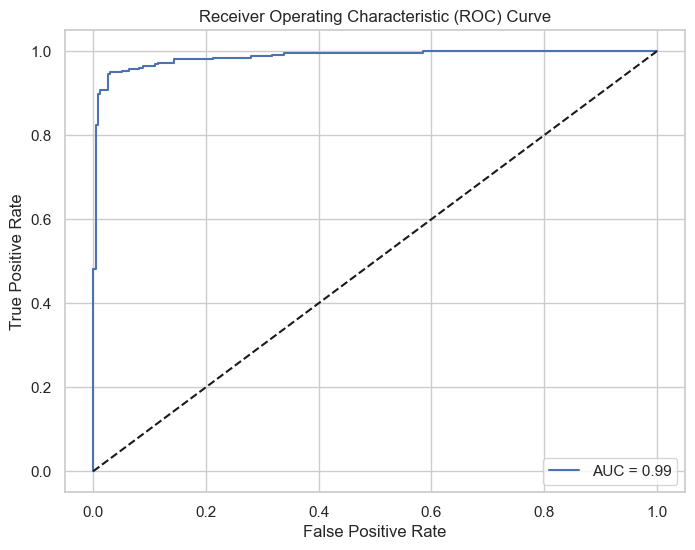

In [51]:
# AUC-ROC curve
y_probs = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_probs)
print(f"AUC-ROC Curve Value: {roc_auc:.2f}")

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [52]:
#k-fold cross validation on the best performed model
model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0) 

k_folds = 5 

stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# printing the results
cross_val_results = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

print("Cross-Validation Results of our best performing model: CatBoost")
print("Individual Fold Scores:", cross_val_results)
print("Mean Accuracy:", cross_val_results.mean())
print("Standard Deviation of Accuracy:", cross_val_results.std())

Cross-Validation Results of our best performing model: CatBoost
Individual Fold Scores: [0.90379747 0.9164557  0.91370558 0.88324873 0.92385787]
Mean Accuracy: 0.9082130694596158
Standard Deviation of Accuracy: 0.014039829490045954


In [53]:
# Gradient Boosting classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
model.fit(a_train, b_train)
b_pred = model.predict(a_test)

# Printing the accuracy
accuracy = accuracy_score(b_test, b_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(b_test, b_pred))
print("Confusion Matrix:")
print(confusion_matrix(b_test, b_pred))

# feature importances
feature_importances = model.feature_importances_

num_features = a_train.shape[1]
feature_names = [f"Feature_{i}" for i in range(num_features)]
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Printing the feature importance scores
print("\nFeature Importance Scores:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance:.4f}")

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       246
           1       0.52      0.25      0.34        48

    accuracy                           0.84       294
   macro avg       0.69      0.60      0.62       294
weighted avg       0.81      0.84      0.82       294

Confusion Matrix:
[[235  11]
 [ 36  12]]

Feature Importance Scores:
Feature_15: 0.1765
Feature_19: 0.1056
Feature_0: 0.0660
Feature_1: 0.0565
Feature_24: 0.0520
Feature_7: 0.0504
Feature_25: 0.0485
Feature_10: 0.0473
Feature_12: 0.0465
Feature_9: 0.0356
Feature_3: 0.0344
Feature_13: 0.0339
Feature_28: 0.0299
Feature_17: 0.0292
Feature_6: 0.0255
Feature_30: 0.0248
Feature_16: 0.0232
Feature_31: 0.0209
Feature_20: 0.0202
Feature_14: 0.0180
Feature_26: 0.0169
Feature_22: 0.0134
Feature_27: 0.0128
Feature_8: 0.0034
Feature_29: 0.0032
Feature_11: 0.0029
Feature_4: 0.0020
Feature_2: 0.0004
Feature_5: 0.0000
Feature_18: 0.0000
Featur

In [54]:
# AUC-ROC curve
b_probs = model.predict_proba(a_test)[:, 1]
roc_auc = roc_auc_score(b_test, b_probs)
print(f"AUC-ROC Curve Value: {roc_auc:.2f}")

AUC-ROC Curve Value: 0.80


In [55]:
# Gradient Boosting classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# feature importances
feature_importances = model.feature_importances_

num_features = X_train.shape[1]
feature_names = [f"Feature_{i}" for i in range(num_features)]
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Printing the feature importance scores
print("\nFeature Importance Scores:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance:.4f}")

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       236
           1       0.89      0.88      0.88       258

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494

Confusion Matrix:
[[208  28]
 [ 31 227]]

Feature Importance Scores:
Feature_24: 0.1563
Feature_13: 0.1036
Feature_7: 0.0756
Feature_15: 0.0650
Feature_10: 0.0647
Feature_22: 0.0551
Feature_31: 0.0411
Feature_26: 0.0388
Feature_27: 0.0385
Feature_3: 0.0361
Feature_11: 0.0332
Feature_29: 0.0315
Feature_1: 0.0295
Feature_14: 0.0279
Feature_19: 0.0252
Feature_16: 0.0239
Feature_25: 0.0233
Feature_4: 0.0212
Feature_6: 0.0211
Feature_0: 0.0160
Feature_30: 0.0142
Feature_12: 0.0118
Feature_20: 0.0094
Feature_21: 0.0089
Feature_17: 0.0087
Feature_8: 0.0069
Feature_28: 0.0052
Feature_9: 0.0044
Feature_2: 0.0027
Feature_5: 0.0000
Featur

In [56]:
# AUC-ROC curve
y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"AUC-ROC Curve Value: {roc_auc:.2f}")

AUC-ROC Curve Value: 0.96


In [57]:
# XGBoost classifier
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
model.fit(a_train, b_train)
b_pred = model.predict(a_test)

# Printing the accuracy
accuracy = accuracy_score(b_test, b_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(b_test, b_pred))
print("Confusion Matrix:")
print(confusion_matrix(b_test, b_pred))

# feature importance
importances = model.get_booster().get_score(importance_type='weight')
total_importance = sum(importances.values())
normalized_importances = {key: value/total_importance for key, value in importances.items()}
sorted_importances = sorted(normalized_importances.items(), key=lambda x: x[1], reverse=True)

# Printing the feature importance scores
print("\nFeature Importance Scores:")
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.4f}")

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       246
           1       0.60      0.31      0.41        48

    accuracy                           0.85       294
   macro avg       0.74      0.64      0.66       294
weighted avg       0.83      0.85      0.83       294

Confusion Matrix:
[[236  10]
 [ 33  15]]

Feature Importance Scores:
f15: 0.0904
f3: 0.0637
f0: 0.0622
f12: 0.0563
f1: 0.0533
f9: 0.0519
f19: 0.0489
f22: 0.0474
f6: 0.0459
f13: 0.0444
f7: 0.0415
f10: 0.0415
f24: 0.0415
f16: 0.0356
f17: 0.0326
f30: 0.0326
f31: 0.0326
f25: 0.0311
f20: 0.0296
f26: 0.0207
f27: 0.0207
f14: 0.0193
f11: 0.0133
f28: 0.0133
f8: 0.0104
f29: 0.0104
f4: 0.0074
f2: 0.0015


In [58]:
# AUC-ROC curve
b_probs = model.predict_proba(a_test)[:, 1]
roc_auc = roc_auc_score(b_test, b_probs)
print(f"AUC-ROC Curve Value: {roc_auc:.2f}")

AUC-ROC Curve Value: 0.79


In [59]:
# XGBoost classifier
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0) 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# feature importance
importances = model.get_booster().get_score(importance_type='weight')
total_importance = sum(importances.values())
normalized_importances = {key: value/total_importance for key, value in importances.items()}
sorted_importances = sorted(normalized_importances.items(), key=lambda x: x[1], reverse=True)

# Printing the feature importance scores
print("\nFeature Importance Scores:")
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.4f}")

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       236
           1       0.88      0.88      0.88       258

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494

Confusion Matrix:
[[205  31]
 [ 30 228]]

Feature Importance Scores:
f15: 0.0855
f1: 0.0739
f3: 0.0681
f7: 0.0507
f10: 0.0507
f6: 0.0493
f16: 0.0435
f13: 0.0420
f31: 0.0420
f26: 0.0406
f0: 0.0391
f30: 0.0348
f12: 0.0333
f19: 0.0333
f27: 0.0333
f22: 0.0304
f24: 0.0304
f29: 0.0290
f20: 0.0275
f28: 0.0261
f9: 0.0203
f17: 0.0203
f25: 0.0203
f4: 0.0188
f8: 0.0159
f14: 0.0159
f11: 0.0130
f21: 0.0101
f2: 0.0014


In [60]:
# AUC-ROC curve
y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"AUC-ROC Curve Value: {roc_auc:.2f}")

AUC-ROC Curve Value: 0.96
